## House Price Prediction 
- - We all have experienced a time when we have to look up for a new house to buy. But then the journey begins with a lot of frauds, negotiating deals, researching the local areas and so on.

#### So to deal with this kind of issues Today we will be preparing a MACHINE LEARNING Based model, trained on the House Price Prediction Dataset.

In [ ]:
# install the packages needed

pip install pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load the dataset and check the info
df = pd.read_excel("./HousePricePrediction.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [3]:
# display first 5
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


1	Id	To count the records.

2	MSSubClass	 Identifies the type of dwelling involved in the sale.

3	MSZoning	Identifies the general zoning classification of the sale.

4	LotArea	 Lot size in square feet.

5	LotConfig	Configuration of the lot

6	BldgType	Type of dwelling

7	OverallCond	Rates the overall condition of the house

8	YearBuilt	Original construction year

9	YearRemodAdd	Remodel date (same as construction date if no remodeling or additions).

10	Exterior1st	Exterior covering on house

11	BsmtFinSF2	Type 2 finished square feet.

12	TotalBsmtSF	Total square feet of basement area

13	SalePrice	To be predicted

In [4]:
# describe
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [5]:
# check the numbers of unique values in each category
df.nunique()

Id              2919
MSSubClass        16
MSZoning           5
LotArea         1951
LotConfig          5
BldgType           5
OverallCond        9
YearBuilt        118
YearRemodAdd      61
Exterior1st       15
BsmtFinSF2       272
TotalBsmtSF     1058
SalePrice        663
dtype: int64

In [6]:
# number of entries
df.shape[0]

2919

###### Clean data

In [7]:
# lower and replace space with underscore
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotarea', 'lotconfig', 'bldgtype',
       'overallcond', 'yearbuilt', 'yearremodadd', 'exterior1st', 'bsmtfinsf2',
       'totalbsmtsf', 'saleprice'],
      dtype='object')

In [8]:
# seprate numerical values from categorical values
df_numerical = df.select_dtypes(include=np.number).columns
df_category = df.select_dtypes(include=object).columns

In [9]:
df_numerical, df_category


(Index(['id', 'mssubclass', 'lotarea', 'overallcond', 'yearbuilt',
        'yearremodadd', 'bsmtfinsf2', 'totalbsmtsf', 'saleprice'],
       dtype='object'),
 Index(['mszoning', 'lotconfig', 'bldgtype', 'exterior1st'], dtype='object'))

In [10]:
# lower and replace space with underscore for each categorical colunm values
for col in df_category:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [11]:
# check the changes
df.head()

,id,mssubclass,mszoning,lotarea,lotconfig,bldgtype,overallcond,yearbuilt,yearremodadd,exterior1st,bsmtfinsf2,totalbsmtsf,saleprice
0,0,60,rl,8450,inside,1fam,5,2003,2003,vinylsd,0.0,856.0,208500.0
1,1,20,rl,9600,fr2,1fam,8,1976,1976,metalsd,0.0,1262.0,181500.0
2,2,60,rl,11250,inside,1fam,5,2001,2002,vinylsd,0.0,920.0,223500.0
3,3,70,rl,9550,corner,1fam,5,1915,1970,wd_sdng,0.0,756.0,140000.0
4,4,60,rl,14260,fr2,1fam,5,2000,2000,vinylsd,0.0,1145.0,250000.0


In [12]:
# check null values

df.isnull().sum()

id                 0
mssubclass         0
mszoning           4
lotarea            0
lotconfig          0
bldgtype           0
overallcond        0
yearbuilt          0
yearremodadd       0
exterior1st        1
bsmtfinsf2         1
totalbsmtsf        1
saleprice       1459
dtype: int64

In [ ]:
# check the datatypes present 

obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 6
Float variables: 3


### EDA

In [ ]:
import seaborn as sns


In [28]:
# seprate numerical values from categorical values
df_numerical = df.select_dtypes(include=np.number).columns
df_category = df.select_dtypes(include=object).columns

df_numerical, df_category


(Index(['id', 'mssubclass', 'lotarea', 'overallcond', 'yearbuilt',
        'yearremodadd', 'bsmtfinsf2', 'totalbsmtsf', 'saleprice'],
       dtype='object'),
 Index(['mszoning', 'lotconfig', 'bldgtype', 'exterior1st'], dtype='object'))

<Axes: >

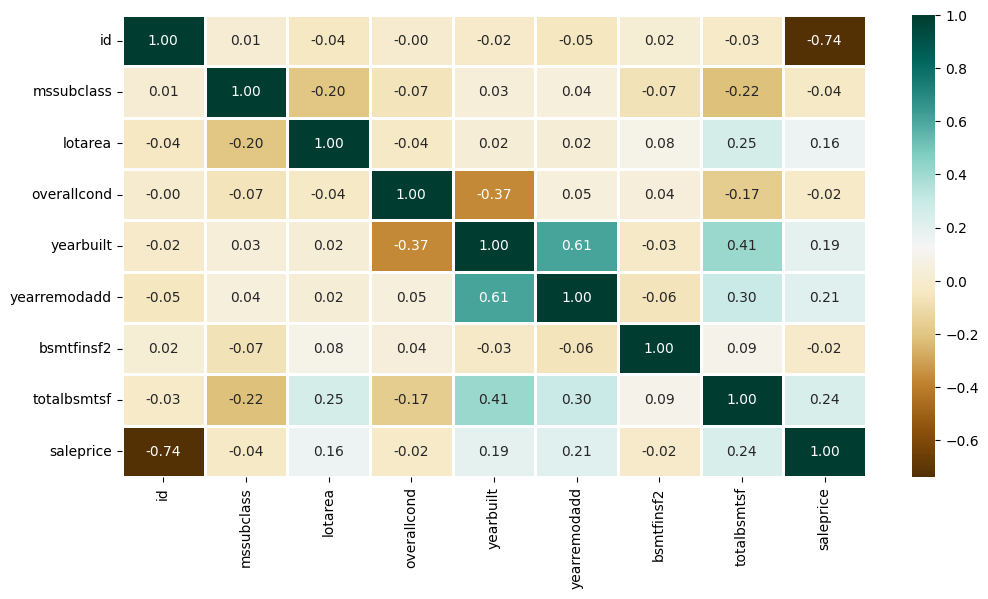

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(df[df_numerical].corr(), cmap="BrBG", fmt=".2f", linewidths="2", annot=True)

In [ ]:
unique_values = []

for col in df_category:
    unique_values.append(df[col].unique().size)
    
    plt.figure(figsize=(10,6))
    plt.title("No. of  unique values of categorical value")
    plt.xticks(rotation= 90)
    sns.barplot(x = df_category, y = unique_values)

In [ ]:
unique_values = [] for col in df_category: if col in df.columns: # Check if column exists in dataframe unique_values.append(df[col].nunique()) if len(df_category) == len(unique_values): # Ensure lengths match plt.figure(figsize=(10, 6)) plt.title("No. of Unique Values of Categorical Columns") plt.xticks(rotation=90) sns.barplot(x=df_category, y=unique_values) plt.xlabel('Categorical Columns') plt.ylabel('Number of Unique Values') plt.show() else: print("The lengths of df_category and unique_values do not match.")

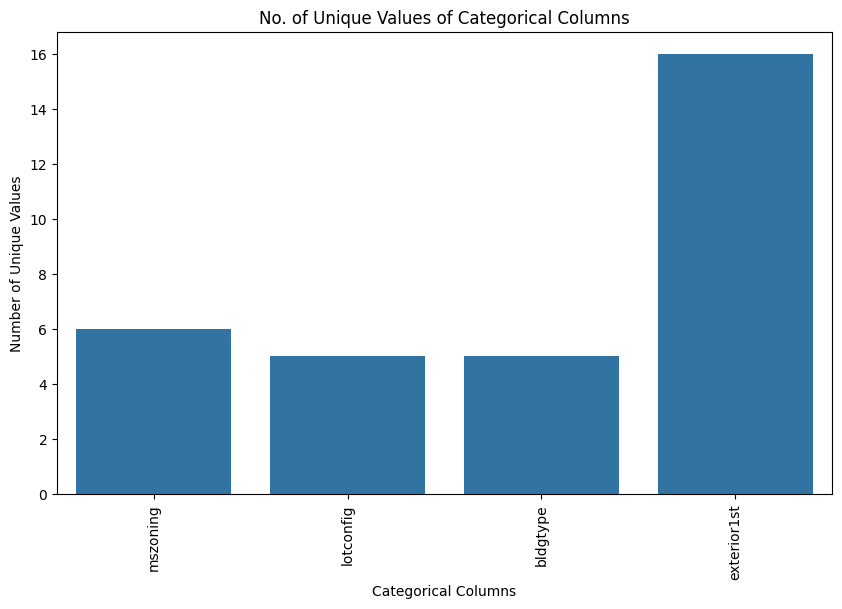

In [31]:

unique_values = []

for col in df_category:
    if col in df.columns:  # Check if column exists in dataframe
        unique_values.append(df[col].nunique())

if len(df_category) == len(unique_values):  # Ensure lengths match
    plt.figure(figsize=(10, 6))
    plt.title("No. of Unique Values of Categorical Columns")
    plt.xticks(rotation=90)
    sns.barplot(x=df_category, y=unique_values)
    plt.xlabel('Categorical Columns')
    plt.ylabel('Number of Unique Values')
    plt.show()
else:
    print("The lengths of df_category and unique_values do not match.")
